![Title](https://workablehr.s3.amazonaws.com/uploads/account/logo/178168/luizalabs.png)

# Princípios de Data Science

Data science é área que estuda a extração de conhecimento encodada de dados.

Esse curso tem como objetivo passar intuições, evitando ao máximo fórmulas, sobre como tratar e vizualizar os dados a fim de extrair informações. Num primeiro momento vocês serão apresentados aos conceitos base com o objetivo de criar um vocabulário comum e colocar todos numa mesma página. Depois, vocês serão terão uma experiência prática de como aplicar esse conhecimentos.

In [1]:
# importar bibliotecas externas
import warnings

import numpy as np
import pandas as pd
import seaborn as sea
from scipy.stats import skewnorm
from statistics import mode
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

# Conceitos Básicos

In [2]:
# criação de um dataset aleatório
size = 10
df = pd.DataFrame(
    {
        'educação':[['médio', 'superior', 'mestrado', 'doutorado'][i] for i in np.random.randint(0, 4, size=size)],
        'idade': np.random.randint(20, 50, size=size),
        'salário': np.random.randint(2e3, 10e3, size=size),
        'altura': [round(h, 2) for h in np.random.uniform(1.5, 1.95, size=10)]
    }
)
df

,altura,educação,idade,salário
0,1.93,doutorado,33,8460
1,1.75,médio,39,8059
2,1.90,superior,20,4792
3,1.52,mestrado,23,9158
4,1.77,médio,44,5986
5,1.63,médio,29,8425
6,1.64,doutorado,31,8440
7,1.56,mestrado,41,9399
8,1.57,doutorado,24,4566
9,1.72,médio,39,9034


**O que é uma variável?**

Variáveis são as caracteristicas de um determinado evento. No exemplo acima, as variáveis são: *altura, educação, idade, salário.

**O que é um evento?**

Um evento é a ocorrência de um acontecimento onde as circunstâncias foram salvas como variáveis. No exemplo acima, cada linha é um evento

**O que é um dataset?**

Um dataset é um conjunto de eventos. No exemplo acima, a table toda.

## Intuição do Curso

objetivo: entendimento do conjunto de eventos (dataset)

- análise dos eventos (linha)
- análise das variáveis uma a uma (coluna)
- análise das interferências entre variáveis (multi-coluna)

In [3]:
df

,altura,educação,idade,salário
0,1.93,doutorado,33,8460
1,1.75,médio,39,8059
2,1.90,superior,20,4792
3,1.52,mestrado,23,9158
4,1.77,médio,44,5986
5,1.63,médio,29,8425
6,1.64,doutorado,31,8440
7,1.56,mestrado,41,9399
8,1.57,doutorado,24,4566
9,1.72,médio,39,9034


# Análise dos Eventos

## Dependência entre eventos

Quando estamos analisando os eventos de um dataset (as linhas) a primeira pergunta que devemos nos perguntar é se esse eventos tem influência um sobre os outros ou se são isolados, o que é chamado em linguagem estatística de estudo de independência.

In [4]:
df

,altura,educação,idade,salário
0,1.93,doutorado,33,8460
1,1.75,médio,39,8059
2,1.90,superior,20,4792
3,1.52,mestrado,23,9158
4,1.77,médio,44,5986
5,1.63,médio,29,8425
6,1.64,doutorado,31,8440
7,1.56,mestrado,41,9399
8,1.57,doutorado,24,4566
9,1.72,médio,39,9034


# Análise das Variáveis

## Descrevendo as variáveis

A estudo da descrição das variáveis chama *Estatística Descritiva*. Ela tange conceitos como:

- Tipos de variáveis
- Média e Mediana
- Variância
- Distribuições
- Tabela de Frenquências

### Tipo da Variável

- **numérica:** 1, 2, 3, .. , 0.5, pi, etc

- **categórica:** segunda, terça, quarta, etc

- **ordinal:** 1°, 2°, 3°, etc

## Variáveis Categóricas

Uma variável categórica tem como valores classes ou categorias.
Isso acontece quando os valores de uma variável não podem ser ordenados e não existe o conceito de distância entre elas.

Vamos pegar o exemplo da quantidade de lojas do Magalu por estado:

In [5]:
# exemplo de variável categórica
df = pd.DataFrame(
    [['sp', 'rj', 'mg', 'pr', 'sp', 'sc', 'pe'][i] for i in np.random.randint(0, 7, size=100)],
    columns=['state']
)
df.head()

,state
0,pr
1,sp
2,mg
3,mg
4,sc


Para termos uma visão resumida do que acontece podemos simplemente contar o número de ocorrências

In [6]:
df.state.value_counts()

sp    28
rj    18
pr    17
mg    17
pe    10
sc    10
Name: state, dtype: int64

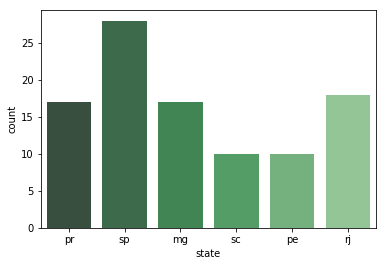

In [7]:
sea.countplot(x='state', data=df, palette="Greens_d");

Muitas vezes as variáveis categoricas podem ser reinterpretadas. Um exemplo disso seria:

In [8]:
df[df.state.isin(['sp', 'rj', 'mg'])] = 'sudeste'
df[df.state.isin(['pr', 'sc', 'rs'])] = 'sul'
df[df.state.isin(['pe'])] = 'nordeste'

In [9]:
df.state.value_counts()

sudeste     63
sul         27
nordeste    10
Name: state, dtype: int64

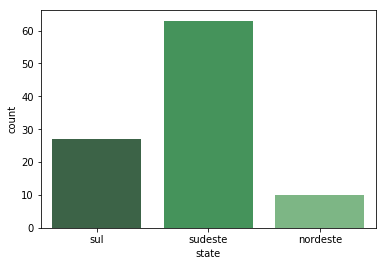

In [10]:
sea.countplot(x='state', data=df, palette="Greens_d");

Essa reinterpretação permite concluir que atualmente as lojas se concentram na região sudeste que pode ser uma informação mais rica para a análise em questão.

# Variáveis Numéricas

As características de um evento muitas vezes são representadas por um valor, uma quantidade, um tamanho, etc justamente quando queremos quantificar e ordenar essa informação.

Vamos fazer do mesmo jeito que fizemos com as variáveis categóricas. Contar a aparição das ocorrências.

[0.  0.  0.  0.  0.  1.  1.  1.3 1.3]


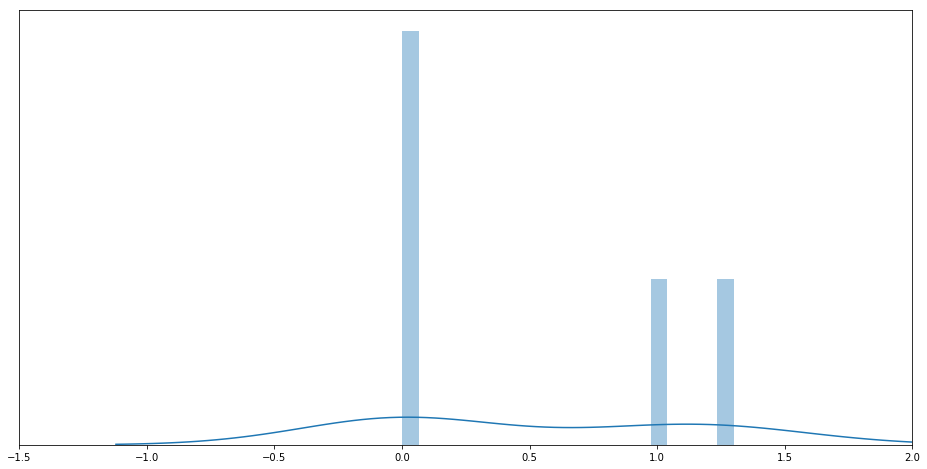

In [11]:
# escolha do número de cestas
dist = np.array([0] * 5 + [1] * 2 + [1.3] * 2)

print(dist)

dists = (
    dist,
)

bins = (
    20,
)

# plot
f, ax = plt.subplots(1, len(dists), figsize=(16,8))
sea.distplot(dist, bins=bins[0], ax=ax)
ax.set_xlim([-1.5, 2])
ax.get_yaxis().set_visible(False)

[0.  0.  0.  0.  0.  1.  1.  1.3 1.3]


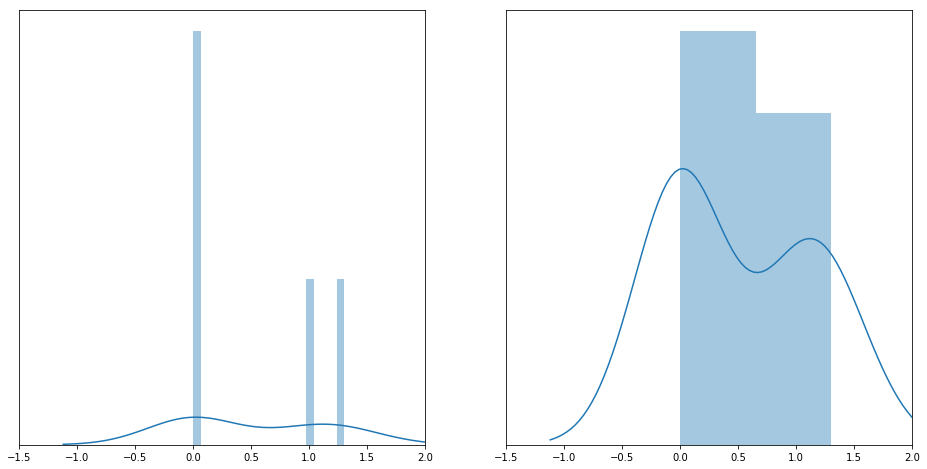

In [12]:
# escolha do número de cestas
dist = np.array([0] * 5 + [1] * 2 + [1.3] * 2)

print(dist)

dists = (
    dist,
    dist,
)

bins = (
    20,
    2
)

# plot
f, axes = plt.subplots(1, len(dists), figsize=(16,8))
for ax, dist, b in zip(axes, dists, bins):
    sea.distplot(dist, bins=b, ax=ax)
    ax.set_xlim([-1.5, 2])
    ax.get_yaxis().set_visible(False)

## Distribuições

As frequências com que cada um das ocorrências de uma variável aparecem seguem um comportamento. Esse comportamento é definido de acordo com a chance de cada ocorrência acontecer.

O termo formal de comportamento das ocorrência é distribuiçao.

### Distribuição Uniforme

É o nome que se dá quando todas as ocorrências tem a mesma chance de acontecer.

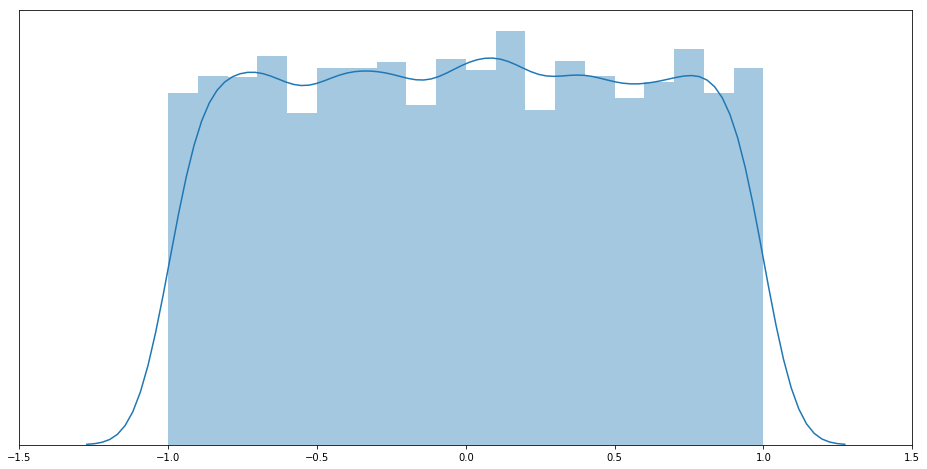

In [13]:
dist = np.random.uniform(-1, 1, size=10000)

# plot
f, ax = plt.subplots(1, 1, figsize=(16,8))
sea.distplot(dist, bins=20, ax=ax)
ax.set_xlim([-1.5, 1.5])
ax.get_yaxis().set_visible(False)

### Distribuição Normal

Uma variável tem distribuição normal quando a chance de valores extremos é exponencialmente menor que a chance de valores comuns.

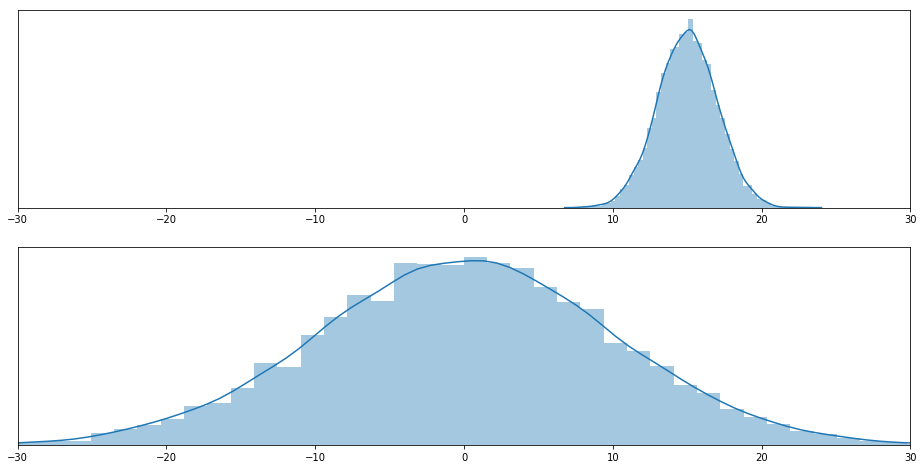

In [14]:
# distribuição normal
dists = (
    np.random.normal(loc=15, scale=2, size=10000),
    np.random.normal(loc=0, scale=10, size=10000),
)

# plot
f, axes = plt.subplots(len(dists), figsize=(16,8))
for ax, dist in zip(axes, dists):
    sea.distplot(dist, ax=ax)
    ax.set_xlim([-30, 30])
    ax.get_yaxis().set_visible(False)

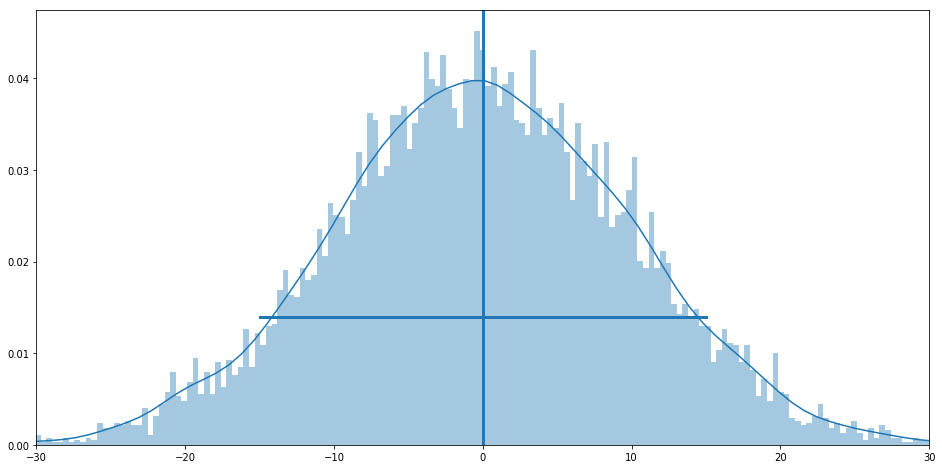

In [15]:
# distribuição normal
dist = np.random.normal(loc=0, scale=10, size=10000)

# plot
f, ax = plt.subplots(1, figsize=(16,8))
sea.distplot(dist, ax=ax, bins=200)
ax.set_xlim([-30, 30]) # fixa o eixo x em -30 a 30
ax.axhline(y=0.014, xmin=0.25, xmax=0.75, linewidth=3) # variancia
ax.bar(dist.mean(), 1, 0.2); # barra da média

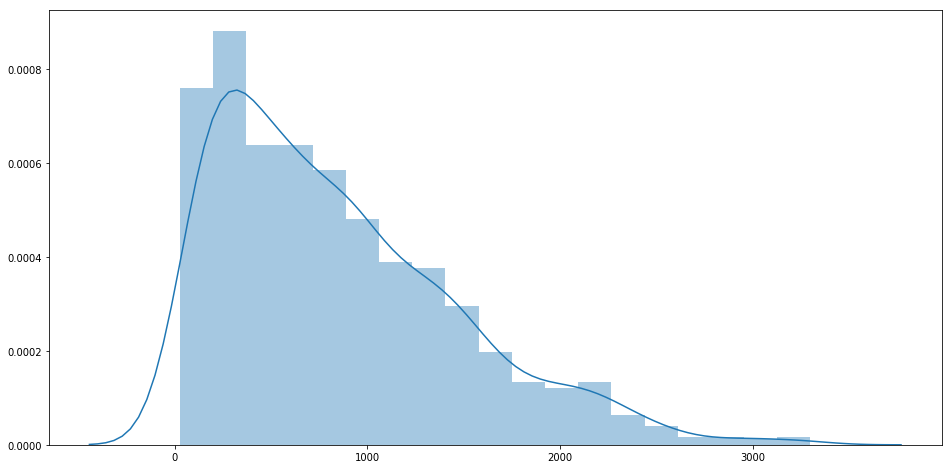

In [16]:
# normal assimétrica
dist = skewnorm.rvs(100, size=1000) * 1000 + 50

f, ax = plt.subplots(1, figsize=(16, 8))
sea.distplot(dist);

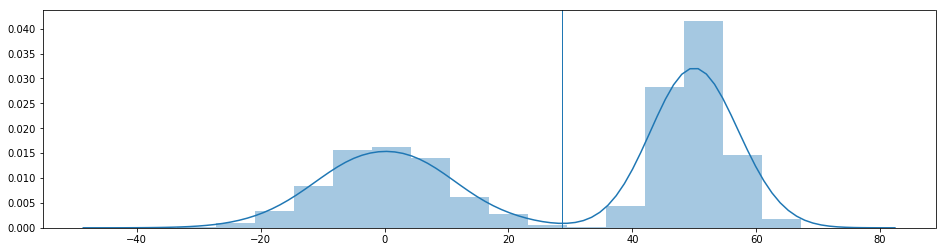

In [17]:
# distribuição multimodal
multinomial = np.concatenate(
    (
        np.random.normal(loc=0, scale=10, size=1500), 
        np.random.normal(loc=50, scale=5 , size=2000)
    )
)

f, axes = plt.subplots(1, figsize=(16,4))
sea.distplot(multinomial, ax=axes)
axes.bar(multinomial.mean(), 1, 0.3);

# Variáveis Ordinais

Variáveis ordinais são entre

## Valores Centrais: Média, Mediana, Moda

Se você tivesse que escolher um valor para representar todo a sua distribuição, qual seria?

**Média:** o valor do centro da distribuição

**Mediana:** o valor que divide os dados na metade

**Moda:** o valor mais frequente

![title](https://scontent.fsdu12-1.fna.fbcdn.net/v/t1.0-9/12274547_1169661396396029_1692978426649274790_n.jpg?_nc_cat=0&oh=d4099c502020de5f51f6311cbad11003&oe=5B91C6B2)

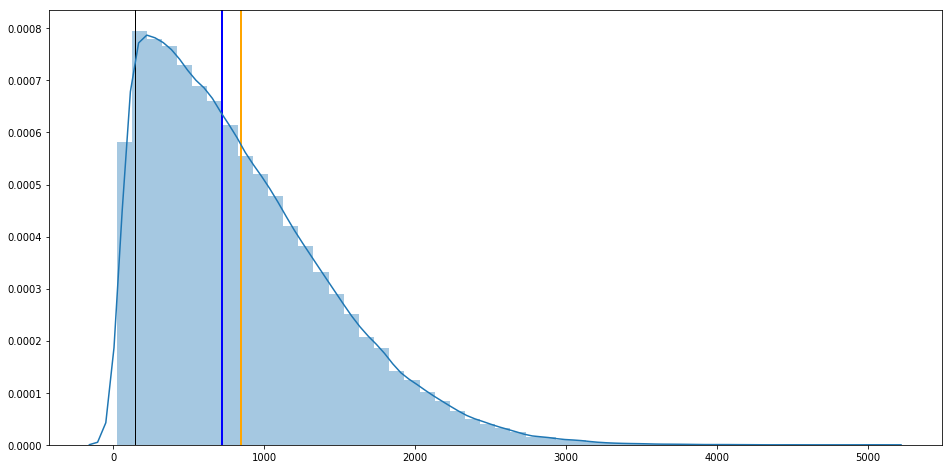

In [18]:
# valores centrais para distribuição normal assimétrica
dist = skewnorm.rvs(100, size=100000) * 1000 + 50

f, ax = plt.subplots(1, figsize=(16, 8))
sea.distplot(dist)

ax.bar(dist.mean(), 10, 10, color='orange') # média
ax.bar(mode([int(d) for d in dist]), 10, 10, color='black') # mode
ax.bar(np.median(dist), 10, 10, color='blue'); # mediana

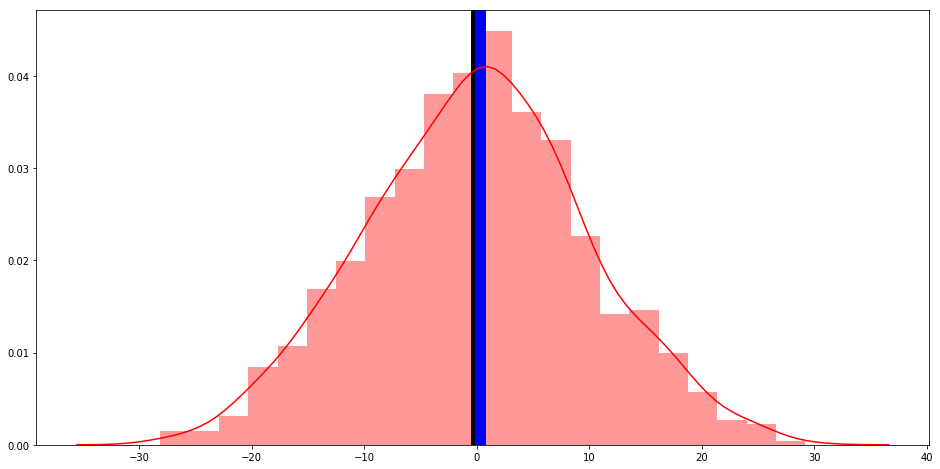

In [19]:
# valores centrais para distribuição normal
dist = np.random.normal(loc=0, scale=10, size=1000)

f, ax = plt.subplots(1, figsize=(16, 8))
sea.distplot(dist, color='red')

ax.bar(dist.mean(), 1, 1, color='orange') # média
ax.bar(mode([int(d) for d in dist]), 1, 1, color='black') # mode
ax.bar(np.median(dist), 1, 1, color='blue'); # mediana

# Variabilidade: Intervalo e Variancia

Como você mediria quanto os seus dados variam?

dist_0 - min: -50.0 max: 50.0 std: 2.0
dist_1 - min: -37.0 max: 41.0 std: 10.0


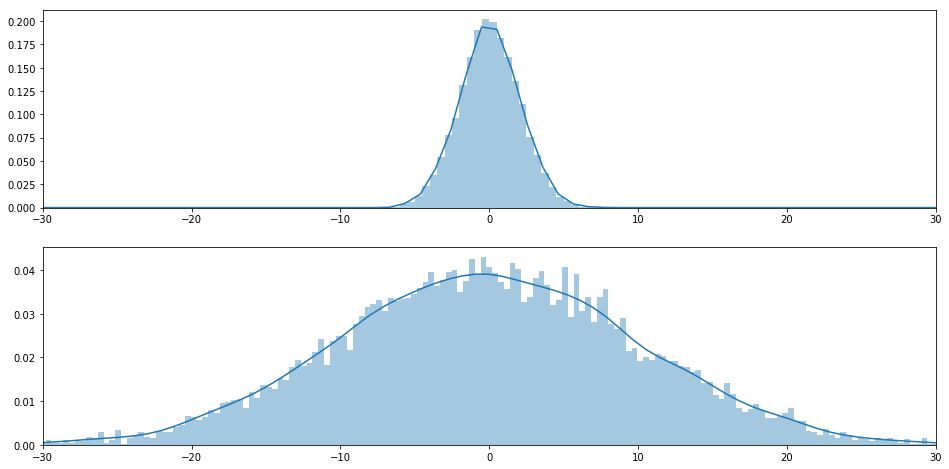

In [20]:
dists = (
    np.concatenate([np.random.normal(loc=0, scale=2 , size=9998), np.array([-50, 50])]),
    np.random.normal(loc=0, scale=10, size=10000),
)

# plot
f, axes = plt.subplots(len(dists), figsize=(16,8))
for i, ax, dist in zip(range(len(dists)), axes, dists):
    sea.distplot(dist, ax=ax, bins=200)
    ax.set_xlim([-30, 30])
    
    print(
        'dist_{num} - min: {min} max: {max} std: {std}'
        .format(
            num=i,
            min=round(min(dist)),
            max=round(max(dist)),
            std=round(dist.std())
        )
    )

**Intervalo:** valor máximo e mínimo

**variancia:** distancia média entre o valor central

# Visualização

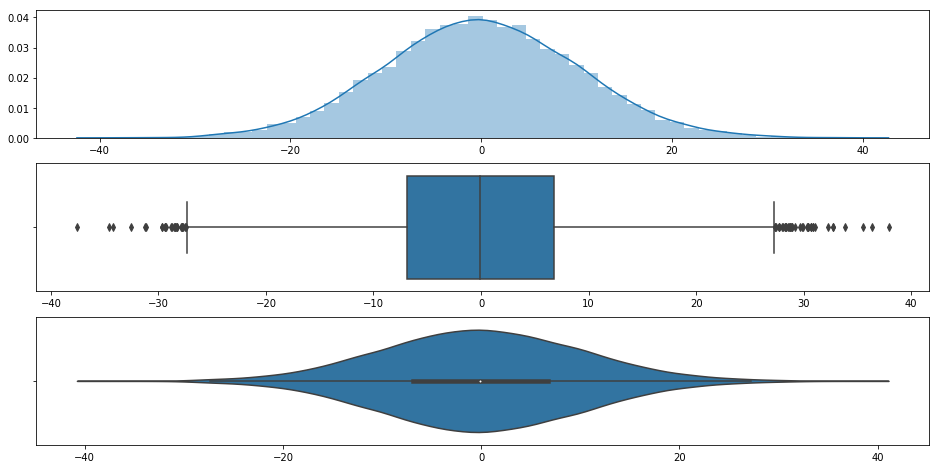

In [21]:
dist = np.random.normal(loc=0, scale=10, size=10000)

plots = (
    sea.distplot,
    sea.boxplot,
    sea.violinplot,
)

f, axes = plt.subplots(len(plots), figsize=(16,8))
for plot, ax in zip(plots, axes):
    plot(dist, ax= ax)

# Qualidade dos dados

- outliers
- dados faltantes

## Outliers

Outliers são valores que fogem do comportamento padrão, que são chamados também de pontos fora da curva.

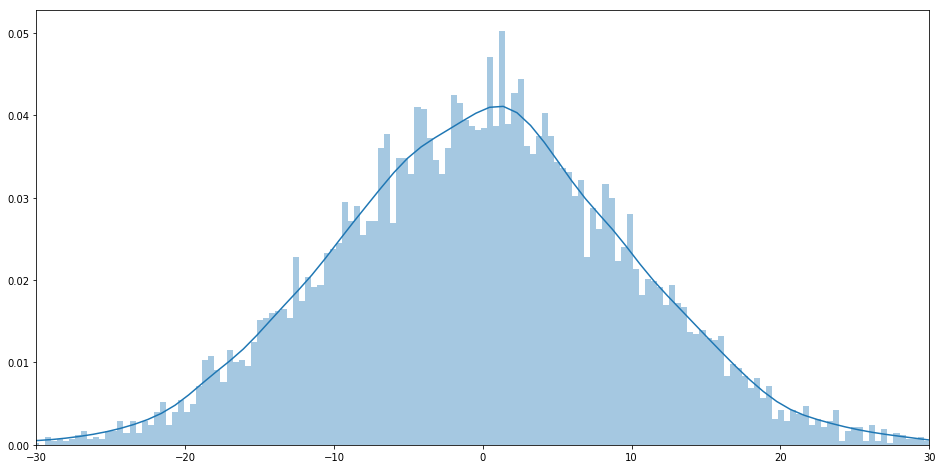

In [22]:
# distribuição normal
dist = np.random.normal(loc=0, scale=10, size=10000)

# plot
f, ax = plt.subplots(1, figsize=(16,8))
sea.distplot(dist, ax=ax, bins=200);
ax.set_xlim([-30, 30]); # fixa o eixo x em -30 a 30

## Dados Faltantes

Muitas vezes ocorrem problemas na hora de salvar o dado ou então realmente não faz sentido aquela ocorrência ter um valor.

Se fizermos qualquer tipo de cálculo em cima desses dados vamos ter problemas. Existem duas maneiras de resolver esse problema:

    - removendo os eventos com dados faltantes
    - preenchendo os eventos com dados fabricados

# Interações entre variáveis

O estudo de interação entre variáveis é de extrema importância. Ele possibilita explicar a aparição de compotamentos dado que alguma variável de análise

## Condicionando Variáveis

Quando condicionamos uma variávei a outra olhamos como a primeira se comporta uma variável sobre influência da outra.

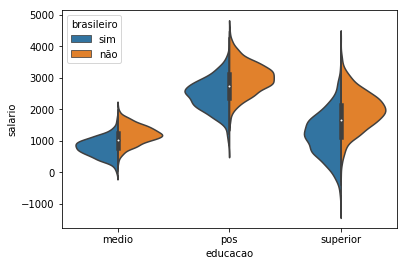

In [23]:
size = 10000
df = pd.DataFrame(
    {
        'educacao':[['medio', 'superior', 'pos'][i] for i in np.random.randint(0, 3, size=size)],
        'brasileiro': [['sim', 'não'][i] for i in np.random.randint(0, 2, size=size)],
    }
)

br_medio = (df.brasileiro == 'sim') & (df.educacao == 'medio')
br_super = (df.brasileiro == 'sim') & (df.educacao == 'superior')
br_pos   = (df.brasileiro == 'sim') & (df.educacao == 'pos')

es_medio = (df.brasileiro == 'não') & (df.educacao == 'medio')
es_super = (df.brasileiro == 'não') & (df.educacao == 'superior')
es_pos   = (df.brasileiro == 'não') & (df.educacao == 'pos')

df.loc[br_medio, 'salario'] = np.random.normal(800, 300, size=sum(br_medio))
df.loc[br_super, 'salario'] = np.random.normal(1200, 700, size=sum(br_super))
df.loc[br_pos  , 'salario'] = np.random.normal(2500, 500, size=sum(br_pos  ))

df.loc[es_medio, 'salario'] = np.random.normal(1200, 300, size=sum(es_medio))
df.loc[es_super, 'salario'] = np.random.normal(2000, 600, size=sum(es_super))
df.loc[es_pos  , 'salario'] = np.random.normal(3000, 500, size=sum(es_pos  ))

sea.violinplot(x="educacao", y="salario", hue="brasileiro", data=df, split=True);

## Medida de Correlação

Muitas vezes vemos se uma variável influencia outra medindo se a mudança de valor de uma reflete na outra. Em outras palavras se eu aumentar uma a outra vai diminuir ou aumentar? E o contrário?

É muito comum fazermos um gráfico com cada uma das variáveis nos eixos.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png)

# Coletando Dados

## Amostragem

Na maioria dos casos é impossível ter acesso a todos os dados. Isso quer dizer que temos acesso somente à informações parciais. O processo de coletar dados parciais chama-se amostragem

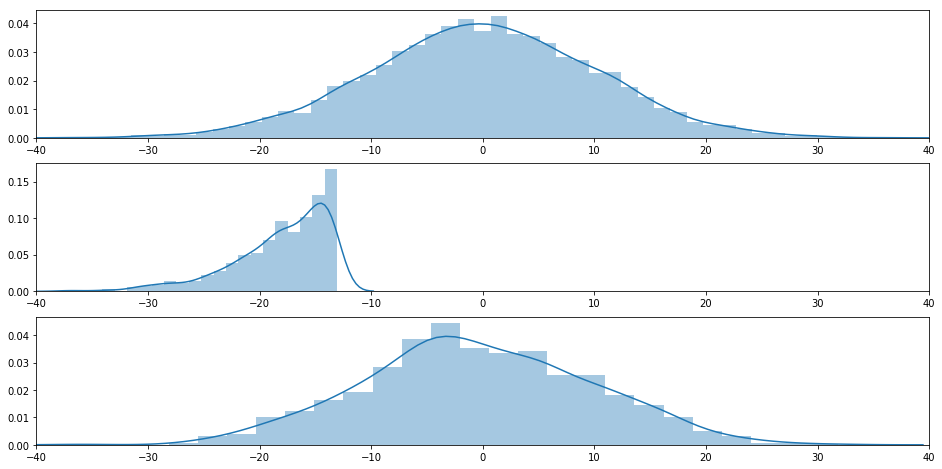

In [24]:
# exemplo normal sorted
dist = np.random.normal(loc=0, scale=10, size=10000)
dist.sort()


dists = (
    dist,
    dist[:1000],
    np.random.choice(dist, size=1000)
)

f, axes = plt.subplots(len(dists), figsize=(16,8))
for dist, ax in zip(dists, axes):
    sea.distplot(dist, ax=ax)
    ax.set_xlim([-40, 40])

Reflexão: O dataset no final das contas também é uma amostragem do que aconteceu

## Lei dos Grandes Números

Todo mundo sabe que você precisa de muito dado para entender o que está acontecendo. Mas por que isso?
Quando você consegue um grande número de dados você garante que o comportamento, ou formalmente a distribuição, vai aparecer.

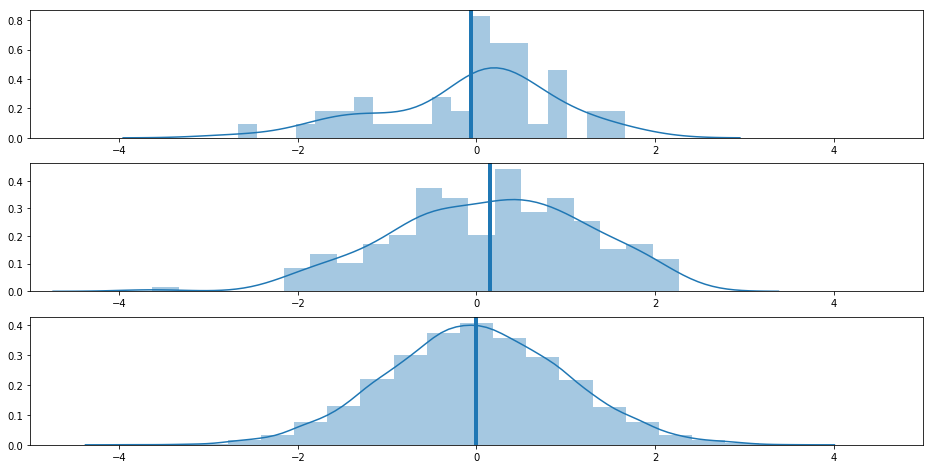

In [25]:
f, axes = plt.subplots(3, figsize=(16,8))

dists = (
    np.random.normal(loc=0, scale=1, size=50),
    np.random.normal(loc=0, scale=1, size=200),
    np.random.normal(loc=0, scale=1, size=10000),
)

for ax, dist in zip(axes, dists):
    sea.distplot(dist, ax=ax, bins=20)
    ax.bar(dist.mean(), 1, width=0.05)
    ax.set_xlim([-5, 5])

# Quiz

Q1. A distribuição de salário da população provavelmente é:
    
    a. uniforme
    b. normal simétrica
    c. categórica
    d. normal assimétrica
    e. bimodal

In [26]:
q1 = []

Q2. Quais são possíveis medidas de disperção das ocorrências de uma variável:

    a. mediana
    b. variância
    c. variabilidade
    d. desvio padrão
    e. intervalo
    

In [27]:
q2 = []

Q3. Como devemos escolher as amostras dos dados:
    
    a. aleatoriamente
    b. pergar os primeiros porque é computacionalmente eficiente
    c. pegar um exemplo de cada tipo
    d. não pegar nenhum exemplo e ir pra casa dormir
    e. pegar todos os dados sempre

In [28]:
q3 = []

Q4. Por que é importante ter um número rasoável de dados:
    
    a. porque senão não conseguimos calcular a média
    b. porque a correlação dele é baixa
    c. porque a sua distribuição se torna mais visível
    d. porque o aumento do número de dados garante uma melhor estatística descritiva
    e. porque 

In [29]:
q4 = []

Q5. Outliers são valores que fogem do padrão. Como detectamos eles:
    
    a. Valores maiores que três vezes a média
    b. Valores menores que três vezes a média
    c. Valores maiores que a média mais o desvio padrão
    d. Valores menores que a média menos o desvio padrão
    e. Valores maiores que a média mais três desvios padrões

In [30]:
q5 = []

Q6. Assinales as alternativas **verdadeiras**:

    a. é possível descrever uma distribuição normal com somente um número
    b. os valores convergem na normal assimétrica
    c. a média é mais importante que a moda
    d. existem várias formas de visualizar uma mesma distribuição
    e. data science estudo técnicas de tirar informações através de dados

In [31]:
q6 = []